# Effect of Data Size on Statistical Tests

### Statistical tests become sensitive as data sizes increase. Alternative tests such as the Cohen's D have to be used. This notebook shows how the 1 sample t-test e.g. is impacted by data size. 

In [40]:
# Referenced Scipy.stats in Tutorialspoint
import scipy.stats as S
import pandas as pd

sample = 0.1
populations = []
pdf = pd.DataFrame()
for i in range(1,4):
    data_size = 10**(i+1)
    
    # This is a normal distribution centered at 0 with a sigma of 1
    population = S.norm.rvs(loc = 0, scale = 1, size = data_size, random_state=1)
    populations.append(population)
    
    x, p_value = S.ttest_1samp(population,sample)
    pdf = pdf.append(pd.DataFrame([[data_size, round(p_value, 4)]],columns=['data_size','p_value']))

pdf

,data_size,p_value
0,100,0.6587
0,1000,0.0490
0,10000,0.0000


### The p_value obviously decreases for larger data size, i.e. using a larger data set, one can better tell the difference between a sample and the population. This makes intuitive sense. 
<br>

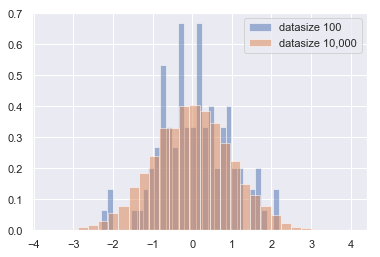

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.hist(populations[0], 30, density=True, alpha=0.5, label='datasize 100')
plt.hist(populations[2], 30, density=True, alpha=0.5, label='datasize 10,000')
plt.legend()
plt.show()

### Graphically, the larger data has a smoother histrogram, makes it easier to determin the center of the peak.  Clearly, some resolution improvement makes sense. 

### However, the resolution becomes arbitarily small which very large dataset, proportional to 1/sqrt(data size), and it's up to the physical context of the data to determine when the impact of the large data size becomes unrealistic. 

In [71]:
# Try a sample much closer to the center of the population, 1/1000 of the sigma. And a much larger dataset.
sample = 0.001 
data_size = 10000000
population = S.norm.rvs(loc = 0, scale = 1, size = data_size, random_state=1)
x, p_value = S.ttest_1samp(population,sample)
pdf = pd.DataFrame([[data_size, round(p_value, 4)]],columns=['data_size','p_value'])
pdf['data_size']=pdf['data_size'].map('{:,}'.format)
pdf

,data_size,p_value
0,"10,000,000",0.0006
